In [1]:
!unzip Data\ Science\ Job\ Salaries\ \(1\).zip

Archive:  Data Science Job Salaries (1).zip
  inflating: ds_salaries.csv         


In [8]:
import pandas as pd

ds_salaries = pd.read_csv('ds_salaries.csv')
ds_salaries.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
ds_salaries.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


The data shows a big spread for salaries in usd, therefore we will try to normalize it to see a better frequency distribution.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ds_salaries['salary_in_usd_standard'] = scaler.fit_transform(ds_salaries[['salary_in_usd']])
ds_salaries.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_norm,salary_in_usd_standard
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,0.253108,0.588192
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,0.206218,0.193263
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,0.211242,0.235577
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,0.246409,0.531774
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,0.330141,1.237005


In [24]:
ds_salaries.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_norm,salary_in_usd_standard
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,0.253108,0.588192
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,0.206218,0.193263
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,0.211242,0.235577
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,0.246409,0.531774
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L,0.330141,1.237005


In [21]:
salaries_exp_level = ds_salaries.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()

In [20]:
salaries_exp_level.head()

,experience_level,mean,median
0,EN,264622.454545,68500.0
1,EX,427072.115385,187500.0
2,MI,480617.690141,85000.0
3,SE,213949.353571,140000.0


the mean>median. Therefore it is skewed to the right (positive skewness).

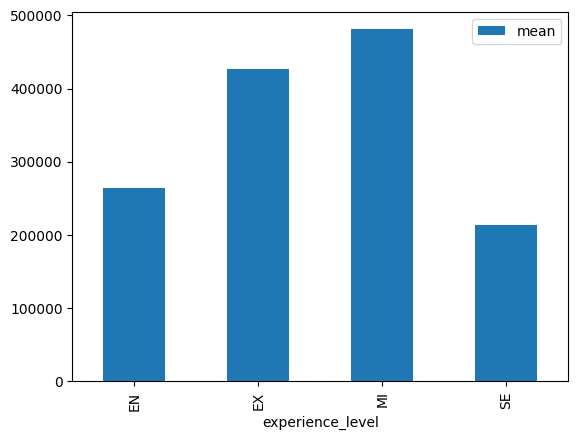

In [22]:
import matplotlib.pyplot as plt

salaries_exp_level.plot(kind='bar', x='experience_level', y='mean')
plt.show()